In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset=pd.read_csv('car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_dataset.shape

(301, 9)

In [6]:
# getting info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checkind the distribution of category data
print(car_dataset['Fuel_Type'].value_counts())

print(car_dataset['Seller_Type'].value_counts())

print(car_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
# encoding the categorical data
# "Fuel_type col"
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':3}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [27]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [32]:
# spliting data and traget
# axis=1 for columns for row axis=0
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [33]:
# print(Y)

In [37]:
# spliting data into training data and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)


In [38]:
# model training
# 1. Linear regression
lin_reg=LinearRegression()

In [39]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [40]:
# model Evaluation
# prediction traing data
prdict=lin_reg.predict(x_train)

In [41]:
# R squared error
error_score=metrics.r2_score(y_train,prdict)
print("R squared error :",error_score)

R squared error : 0.8777735182846061


Text(0.5, 1.0, 'Actual Price vs Predicated Price')

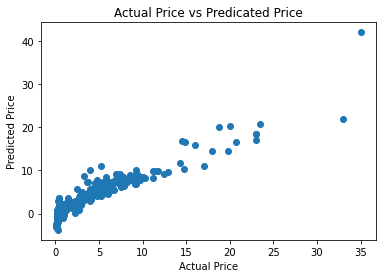

In [42]:
# Visualize actual price and predict prices
plt.scatter(y_train,prdict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicated Price")

In [43]:
# model Evaluation
# prediction traing data
prdict=lin_reg.predict(x_test)

In [44]:
# R squared error
error_score=metrics.r2_score(y_test,prdict)
print("R squared error :",error_score)

R squared error : 0.8162925313688913


Text(0.5, 1.0, 'Actual Price vs Predicated Price')

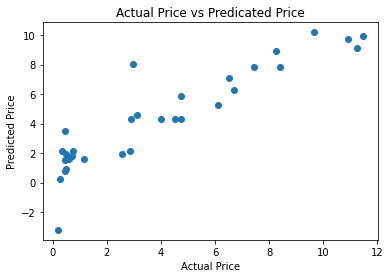

In [45]:
# Visualize actual price and predict prices
plt.scatter(y_test,prdict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicated Price")

In [46]:
# Lasso Regression
laso=Lasso()

In [47]:
laso.fit(x_train,y_train)

Lasso()

In [48]:
# model Evaluation
# prediction traing data
prdict=laso.predict(x_train)

In [49]:
# R squared error
error_score=metrics.r2_score(y_train,prdict)
print("R squared error :",error_score)

R squared error : 0.8427856123435794


Text(0.5, 1.0, 'Actual Price vs Predicated Price')

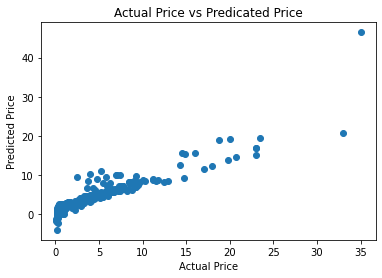

In [50]:
# Visualize actual price and predict prices
plt.scatter(y_train,prdict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicated Price")